# Import Libraries 

In [1]:
import psutil,os,time
import matplotlib.pyplot as plt
import numpy as np

# System Monitoring

## Ram

In [2]:
def get_ram_usage():
    return psutil.virtual_memory().percent

## CPU

In [3]:
def get_cpu_usage():
    return psutil.cpu_percent(interval=1)

## Processes

In [4]:
def get_process_data():
    # return all processes with there pid, name, cpu usage, memory usage, status, and create time in a dictionary
    process_data={}
    for proc in psutil.process_iter(['pid', 'name', 'cpu_percent', 'memory_percent', 'status', 'create_time']):
        process_data[proc.info['pid']] = proc.info
    return process_data

## Get the data

In [5]:
for i in range(10):
    print(f"CPU Usage: {get_cpu_usage()}%")
    print(f"RAM Usage: {get_ram_usage()}%")
    print(get_process_data())
    time.sleep(1)

CPU Usage: 7.0%
RAM Usage: 76.7%
{1: {'pid': 1, 'create_time': 1719986555.83, 'cpu_percent': 0.0, 'memory_percent': 0.2888550514222697, 'name': 'systemd', 'status': 'sleeping'}, 2: {'pid': 2, 'create_time': 1719986555.92, 'cpu_percent': 0.0, 'memory_percent': 0.03531012712657517, 'name': 'init-systemd(Ub', 'status': 'sleeping'}, 7: {'pid': 7, 'create_time': 1719986556.91, 'cpu_percent': 0.0, 'memory_percent': 0.003439955078233684, 'name': 'init', 'status': 'sleeping'}, 51: {'pid': 51, 'create_time': 1719986558.05, 'cpu_percent': 0.0, 'memory_percent': 0.33994850184897585, 'name': 'systemd-journald', 'status': 'sleeping'}, 74: {'pid': 74, 'create_time': 1719986558.48, 'cpu_percent': 0.0, 'memory_percent': 0.14528751448069324, 'name': 'systemd-udevd', 'status': 'sleeping'}, 90: {'pid': 90, 'create_time': 1719986558.64, 'cpu_percent': 0.0, 'memory_percent': 0.004654056870551455, 'name': 'snapfuse', 'status': 'sleeping'}, 92: {'pid': 92, 'create_time': 1719986558.66, 'cpu_percent': 0.0, 'm

## save the data

In [6]:
import json

In [7]:
for i in range(50):
    data={
        "cpu": get_cpu_usage(),
        "ram": get_ram_usage(),
        "processes": get_process_data()
    }
    with open("data.json", "a") as f:
        f.write(json.dumps(data))
        f.write("\n")
    time.sleep(3)

In [16]:
cpu_data=[]
ram_data=[]
with open('data.json', 'r') as file:
    for line in file:
        data=json.loads(line)
        cpu_data.append(data['cpu'])
        ram_data.append(data['ram'])
print(cpu_data)
print(ram_data)

[2.7, 1.7, 59.9, 3.7, 33.7, 0.5, 5.7, 5.3, 5.8, 68.5, 38.7, 62.2, 1.8, 1.5, 37.7, 88.8, 83.9, 83.6, 94.6, 92.6, 62.7, 54.6, 68.3, 52.7, 56.0, 69.7, 75.4, 97.0, 65.9, 57.9, 98.2, 89.0, 80.4, 83.2, 99.7, 62.6, 56.4, 56.4, 97.0, 60.5, 62.3, 93.6, 19.7, 91.5, 87.1, 66.1, 0.7, 42.1, 0.8, 9.0]
[69.6, 69.8, 73.4, 74.8, 78.4, 76.7, 76.3, 76.6, 77.4, 81.2, 85.8, 86.3, 79.5, 77.3, 78.0, 78.6, 78.7, 78.7, 80.1, 80.3, 79.4, 79.9, 79.6, 80.2, 80.3, 82.9, 82.5, 84.4, 86.2, 86.7, 87.7, 88.7, 89.9, 90.1, 89.8, 79.7, 80.0, 80.4, 81.1, 82.3, 83.1, 82.9, 82.9, 84.2, 87.7, 88.5, 90.1, 92.2, 85.6, 87.2]


# Plot CPU and RAM

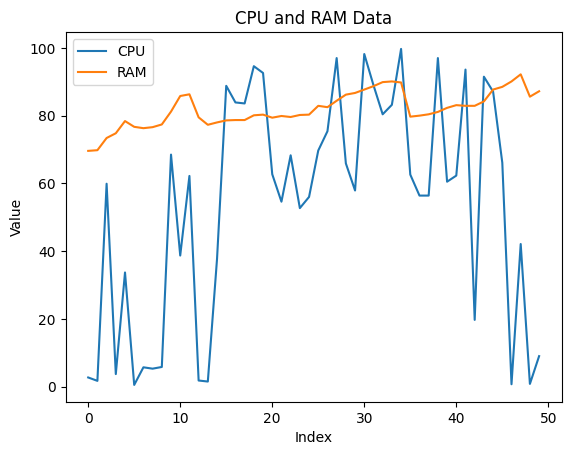

In [17]:

# Create a figure and axes
fig, ax = plt.subplots()

# Plot cpu_data
ax.plot(cpu_data, label='CPU')

# Plot ram_data
ax.plot(ram_data, label='RAM')

# Set labels and title
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title('CPU and RAM Data')

# Add legend
ax.legend()

# Show the plot
plt.show()
